# Assignment 2: Data Augmentation

In [50]:
%matplotlib inline

import numpy as np
import matplotlib
from matplotlib import pyplot
import os
import time

from pandas import DataFrame
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

Upload the `test.csv` and `training.csv` files that you can download from campus virtual.

In [51]:
import pandas as pd

df = pd.read_csv('training_mirror.csv')
overview = df.head(n =1)
print(overview)


   left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   

   mouth_center_bottom_lip_y  \
0                  84.485774   

                                               Image 

In [52]:
import pandas as pd

def mirror_images(df):
    

    # Convert each image into a list
    df['Image'] = df['Image'].apply(lambda im: list(map(int, im.split(' '))))

    # Convert the list into a 96x96 array row-wise left to right
    df['Image'] = df['Image'].apply(lambda im: np.array(im).reshape(96, 96))
    
    # Flip each row of all the arrays
    df['Image'] = df['Image'].apply(lambda im: np.flip(im, axis=1))
    
    df['Image'] = df['Image'].apply(lambda im: im.reshape(9216).tolist())

    # Convert each list into a string with values separated by commas
    df['Image'] = df['Image'].apply(lambda im: ' '.join(map(str, im)))

    # Mirror location values on the x-axis for fields ending with 'x'
    for col in df.columns[:-1]:
       if col.endswith('x'):
           df[col] = 96 - df[col]
    
    # Swap the values for eye_center
    copy = df['left_eye_center_x'].copy()
    df['left_eye_center_x'] = df['right_eye_center_x']
    df['right_eye_center_x'] = copy
    
    copy = df['left_eye_center_y'].copy()
    df['left_eye_center_y'] = df['right_eye_center_y']
    df['right_eye_center_y'] = copy

    # Swap the values for eye_inner_corner
    copy = df['left_eye_inner_corner_x'].copy()
    df['left_eye_inner_corner_x'] = df['right_eye_inner_corner_x']
    df['right_eye_inner_corner_x'] = copy

    copy = df['left_eye_inner_corner_y'].copy()
    df['left_eye_inner_corner_y'] = df['right_eye_inner_corner_y']
    df['right_eye_inner_corner_y'] = copy

    # Swap the values for eye_outer_corner
    copy = df['left_eye_outer_corner_x'].copy()
    df['left_eye_outer_corner_x'] = df['right_eye_outer_corner_x']
    df['right_eye_outer_corner_x'] = copy

    copy = df['left_eye_outer_corner_y'].copy()
    df['left_eye_outer_corner_y'] = df['right_eye_outer_corner_y']
    df['right_eye_outer_corner_y'] = copy

    # Swap the values for eyebrow_inner_end
    copy = df['left_eyebrow_inner_end_x'].copy()
    df['left_eyebrow_inner_end_x'] = df['right_eyebrow_inner_end_x']
    df['right_eyebrow_inner_end_x'] = copy

    copy = df['left_eyebrow_inner_end_y'].copy()
    df['left_eyebrow_inner_end_y'] = df['right_eyebrow_inner_end_y']
    df['right_eyebrow_inner_end_y'] = copy

    # Swap the values for eyebrow_outer_end
    copy = df['left_eyebrow_outer_end_x'].copy()
    df['left_eyebrow_outer_end_x'] = df['right_eyebrow_outer_end_x']
    df['right_eyebrow_outer_end_x'] = copy

    copy = df['left_eyebrow_outer_end_y'].copy()
    df['left_eyebrow_outer_end_y'] = df['right_eyebrow_outer_end_y']
    df['right_eyebrow_outer_end_y'] = copy

    # Swap the values for mouth_corner
    copy = df['mouth_left_corner_x'].copy()
    df['mouth_left_corner_x'] = df['mouth_right_corner_x']
    df['mouth_right_corner_x'] = copy

    copy = df['mouth_left_corner_y'].copy()
    df['mouth_left_corner_y'] = df['mouth_right_corner_y']
    df['mouth_right_corner_y'] = copy
    

    return df

# Load the data from training_mirror.csv
df = pd.read_csv('training_mirror.csv')

# Mirror the images and location values
mirrored_df = mirror_images(df)

# Save the mirrored dataset to a new file
mirrored_df.to_csv('mirrored.csv', index=False)

In [53]:
def load_mirror(test = False, cols = None):
    """
    Loads the dataset.
    Returns a tuple of X and y, if `test` was set to `True` y contains `None`.
    """

    fname = 'mirrored.csv'
    df = read_csv(os.path.expanduser(fname))  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep = ' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]
    df = df.dropna()  # drop all rows that have missing values in them
    print("\n")

    X = np.row_stack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    print("Number of samples in", fname, ":",len(X))
    print("Labels: ", df.columns.tolist())

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None
    return X.reshape(df.shape[0],96,96), y

In [54]:
import pandas as pd
# loading data

FTRAIN = 'training.csv'
FTEST = 'test.csv'

def load(test = False, cols = None):
    """
    Loads the dataset.
    Returns a tuple of X and y, if `test` was set to `True` y contains `None`.
    """

    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname))  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep = ' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]
    df = df.dropna()  # drop all rows that have missing values in them
    print("\n")

    X = np.row_stack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    print("Number of samples in", fname, ":",len(X))
    print("Labels: ", df.columns.tolist())

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None
    return X.reshape(df.shape[0],96,96), y


def plot_sample(x, y):
    """
    Plots a single sample image with keypoints on top.
    """
    pyplot.imshow(x, cmap='gray')
    pyplot.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)



Number of samples in training.csv : 2140
Labels:  ['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y', 'left_eye_inner_corner_x', 'left_eye_inner_corner_y', 'left_eye_outer_corner_x', 'left_eye_outer_corner_y', 'right_eye_inner_corner_x', 'right_eye_inner_corner_y', 'right_eye_outer_corner_x', 'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y', 'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x', 'mouth_right_corner_y', 'mouth_center_top_lip_x', 'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'Image']

 Sample image with labels:


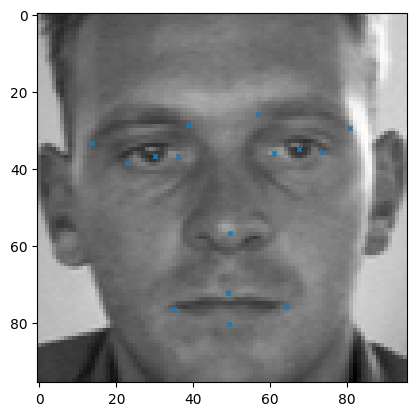

In [55]:
# loading data

X, y = load()

print("\n Sample image with labels:")
plot_sample(X[13],y[13])



Number of samples in mirrored.csv : 2140
Labels:  ['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y', 'left_eye_inner_corner_x', 'left_eye_inner_corner_y', 'left_eye_outer_corner_x', 'left_eye_outer_corner_y', 'right_eye_inner_corner_x', 'right_eye_inner_corner_y', 'right_eye_outer_corner_x', 'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y', 'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x', 'mouth_right_corner_y', 'mouth_center_top_lip_x', 'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'Image']

 Sample image with labels:


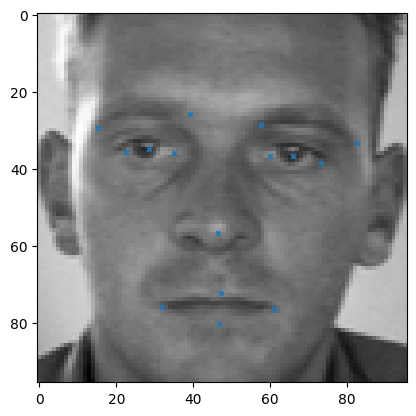

In [56]:
X, y = load_mirror()

print("\n Sample image with labels:")
plot_sample(X[13],y[13])

In [58]:
import pandas as pd

# Read the mirrored dataset from mirrored.csv
mirrored_df = pd.read_csv('mirrored.csv')

# Read the training dataset from training.csv
training_df = pd.read_csv('training.csv')

# Concatenate the two datasets vertically
combined_df = pd.concat([training_df, mirrored_df])

# Save the combined dataset to combined.csv
combined_df.to_csv('combined.csv', index=False)
